notebook for creating performance graphs from loss and accuracy data saved in .pt format from v1-model

In [32]:
import torch
import matplotlib.pyplot as plt
import os
epoch = []
for i in range(90):
    epoch.append(i)

In [46]:
def plot(name, y):
    src = "/research/harris/vivian/v1-models/saved_models/BN_V1_V1_Linear/" + name

    os.chdir(src + "/trial_1")
    loss1 = torch.load("loss.pt")
    accuracy1 = torch.load("accuracy.pt")
    
    os.chdir(src + "/trial_2")
    loss2 = torch.load("loss.pt")
    accuracy2 = torch.load("accuracy.pt")
    
    os.chdir(src + "/trial_3")
    loss3 = torch.load("loss.pt")
    accuracy3 = torch.load("accuracy.pt")
    
    if y == "loss":
        plt.plot(epoch, loss1, label="trial 1")
        plt.plot(epoch, loss2, label="trial 2")
        plt.plot(epoch, loss3, label="trial 3")
        plt.title("Epoch vs Loss");
        plt.xlabel("Epoch");
        plt.ylabel("Test Loss");
    elif y == "accuracy":
        plt.plot(epoch, accuracy1, label="trial 1")
        plt.plot(epoch, accuracy2, label="trial 2")
        plt.plot(epoch, accuracy3, label="trial 3")
        plt.title(" Epoch vs Accuracy");
        plt.xlabel("Epoch");
        plt.ylabel("Test Accuracy");

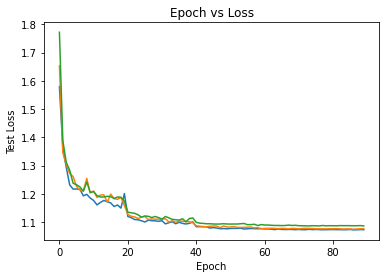

In [47]:
plot("3_1_32_none", "loss")

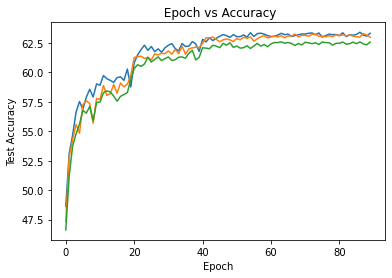

In [48]:
plot("3_1_32_none", "accuracy")

In [73]:
def bar(name):
    src = "/research/harris/vivian/v1-models/saved_models/BN_V1_V1_Linear/" + name

    os.chdir(src + "/trial_1")
    loss1 = torch.load("loss.pt")[-1]
    accuracy1 = torch.load("accuracy.pt")[-1]

    os.chdir(src + "/trial_2")
    loss2 = torch.load("loss.pt")[-1]
    accuracy2 = torch.load("accuracy.pt")[-1]

    os.chdir(src + "/trial_3")
    loss3 = torch.load("loss.pt")[-1]
    accuracy3 = torch.load("accuracy.pt")[-1]

    fig = plt.figure(figsize =(3, 7));
    plt.bar(["trial1", "trial2", "trial3"], [accuracy1, accuracy2, accuracy3], color=['red', 'blue', 'green'])
    plt.title("Accuracy over 3 trials");
    plt.ylabel("Accuracy at the 90th epoch (%)")
    plt.show();

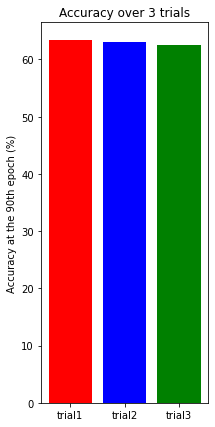

In [74]:
bar("3_1_32_none")

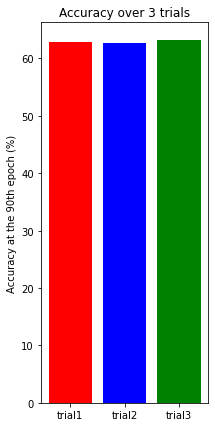

In [75]:
bar("3_1_7_none")

### testing learning rate 

In [8]:
def plot_loss(model, lr, h):
    name = str(lr) + "_" + str(h)
    path = "/research/harris/vivian/v1-models/saved_models/" + model + "/" + name
    os.chdir(path)
    loss = torch.load("loss_" + name + ".pt")
    plt.plot(epoch, loss, label="LR="+str(lr))
    plt.title("Epoch vs Loss, LR=" + str(lr) +", h=" + str(h));
    plt.xlabel("Epoch");
    plt.ylabel("Test Loss after 90 epochs");
    
def plot_accuracy(model, lr, h):
    name = str(lr) + "_" + str(h)
    path = "/research/harris/vivian/v1-models/saved_models/" + model + "/" + name
    os.chdir(path)
    accuracy = torch.load("accuracy_" + name + ".pt")
    plt.plot(epoch, accuracy, label="LR="+str(lr))
    plt.title("Epoch vs Accuracy, LR=" + str(lr) +", h=" + str(h));
    plt.xlabel("Epoch");
    plt.ylabel("Test Accuracy after 90 epochs");

### BN_V1_V1_Linear

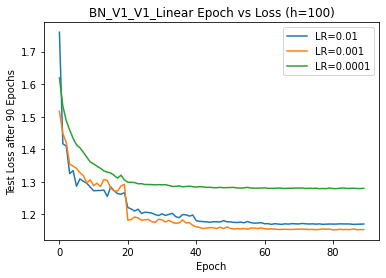

In [28]:
plot_loss("BN_V1_V1_Linear", 0.01, 100)
plot_loss("BN_V1_V1_Linear", 0.001, 100)
plot_loss("BN_V1_V1_Linear", 0.0001, 100)
plt.legend()
plt.title("BN_V1_V1_Linear Epoch vs Loss (h=100)")
plt.xlabel("Epoch")
plt.ylabel("Test Loss after 90 Epochs");

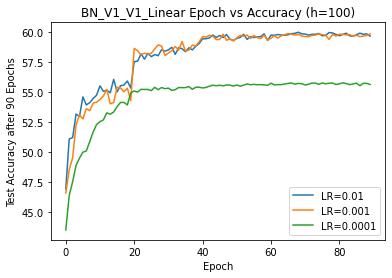

In [29]:
plot_accuracy("BN_V1_V1_Linear", 0.01, 100)
plot_accuracy("BN_V1_V1_Linear", 0.001, 100)
plot_accuracy("BN_V1_V1_Linear", 0.0001, 100)
plt.legend()
plt.title("BN_V1_V1_Linear Epoch vs Accuracy (h=100)")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy after 90 Epochs");

## BN_Linear_Control (no V1 weights initialized)

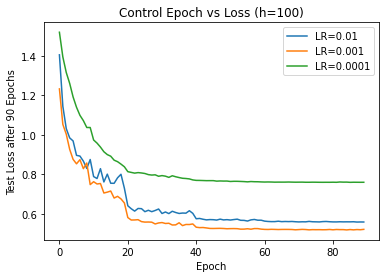

In [36]:
plot_loss("Control_V1_V1", 0.01, 100)
plot_loss("Control_V1_V1", 0.001, 100)
plot_loss("Control_V1_V1", 0.0001, 100)
plt.legend()
plt.title("Control Epoch vs Loss (h=100)")
plt.xlabel("Epoch")
plt.ylabel("Test Loss after 90 Epochs");

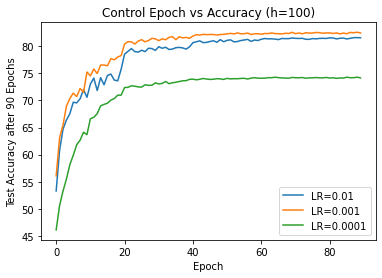

In [35]:
plot_accuracy("Control_V1_V1", 0.01, 100)
plot_accuracy("Control_V1_V1", 0.001, 100)
plot_accuracy("Control_V1_V1", 0.0001, 100)
plt.legend()
plt.title("Control Epoch vs Accuracy (h=100)")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy after 90 Epochs");

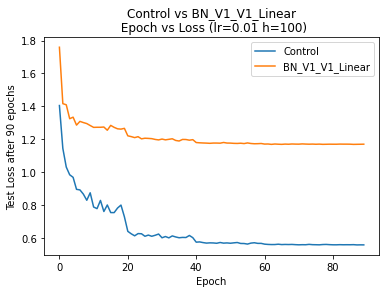

In [44]:
plot_loss("Control_V1_V1", 0.01, 100)
plot_loss("BN_V1_V1_Linear", 0.01, 100)
plt.legend(['Control', 'BN_V1_V1_Linear'])
plt.title("Control vs BN_V1_V1_Linear\n Epoch vs Loss (lr=0.01 h=100)")
plt.xlabel("Epoch")
plt.ylabel("Test Loss after 90 epochs");

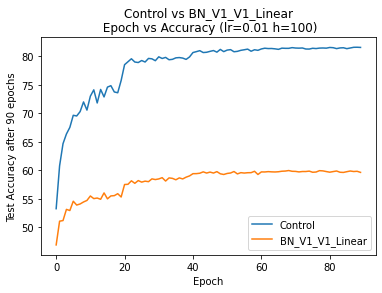

In [43]:
plot_accuracy("Control_V1_V1", 0.01, 100)
plot_accuracy("BN_V1_V1_Linear", 0.01, 100)
plt.legend(['Control', 'BN_V1_V1_Linear'])
plt.title("Control vs BN_V1_V1_Linear\n Epoch vs Accuracy (lr=0.01 h=100)")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy after 90 epochs");

### Control w/ locked weights

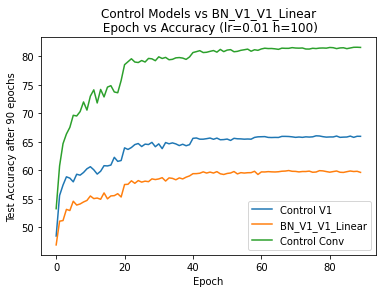

In [7]:
plot_accuracy("Control_V1_V1", 0.01, 100)
plot_accuracy("BN_V1_V1_Linear", 0.01, 100)
plot_accuracy("Control_Conv", 0.01, 100)
plt.legend(['Control V1', 'BN_V1_V1_Linear', 'Control Conv'])
plt.title("Control Models vs BN_V1_V1_Linear\n Epoch vs Accuracy (lr=0.01 h=100)")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy after 90 epochs");

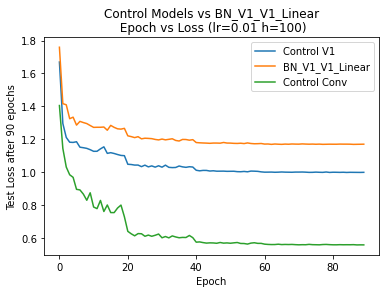

In [8]:
plot_loss("Control_V1_V1", 0.01, 100)
plot_loss("BN_V1_V1_Linear", 0.01, 100)
plot_loss("Control_Conv", 0.01, 100)
plt.legend(['Control V1', 'BN_V1_V1_Linear', 'Control Conv'])
plt.title("Control Models vs BN_V1_V1_Linear\n Epoch vs Loss (lr=0.01 h=100)")
plt.xlabel("Epoch")
plt.ylabel("Test Loss after 90 epochs");

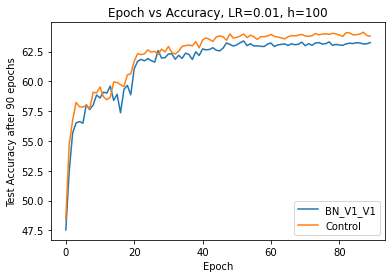

In [15]:
name = "new_0.01_100"
path = "/research/harris/vivian/v1-models/saved_models/BN_V1_V1_Linear/" + name
os.chdir(path)
accuracy = torch.load("accuracy_" + name + ".pt")
plt.plot(epoch, accuracy, label="BN_V1_V1");
plt.title("Epoch vs Accuracy, LR=0.01, h=100");
plot_accuracy("Control_V1_V1", 0.01, 100)
plt.legend(['BN_V1_V1', 'Control']);

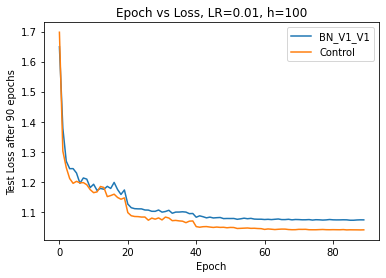

In [17]:
name = "new_0.01_100"
path = "/research/harris/vivian/v1-models/saved_models/BN_V1_V1_Linear/" + name
os.chdir(path)
loss = torch.load("loss_" + name + ".pt")
plt.plot(epoch, loss, label="BN_V1_V1");
plt.title("Epoch vs Loss, LR=0.01, h=100");
plt.xlabel("Epoch");
plt.ylabel("Test Loss after 90 epochs");
plot_loss("Control_V1_V1", 0.01, 100)
plt.legend(['BN_V1_V1', 'Control']);